
# Šiame Jupyter Notebook faile atliekama regresijos analizė  pasiteliant tokius metodus kaip:
 - ANOVA 
 - Studento t-testo rodikliai.


## Duomenų apžvalga:
- importuojami reikalingi paketai 
-  įkeliami duomenys iš CSV failo
-  apžvelgiama duomenų struktūra
-  pateikiama statistinė santrauka
-  duomenų tipai.

In [41]:
# # instaliuojame reikalingus paketus      
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install metrics
!pip install statsmodels

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
# Įkeliamos reikalingos bibliotekos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Įsikeliame duomenis
data = pd.read_csv('day_denormalised.csv')

In [43]:
data.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
721,722,2012-12-22,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
723,724,2012-12-24,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
724,725,2012-12-25,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
725,726,2012-12-26,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
726,727,2012-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [44]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
# Informacija apie duomenis ir jų tipai
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
data.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


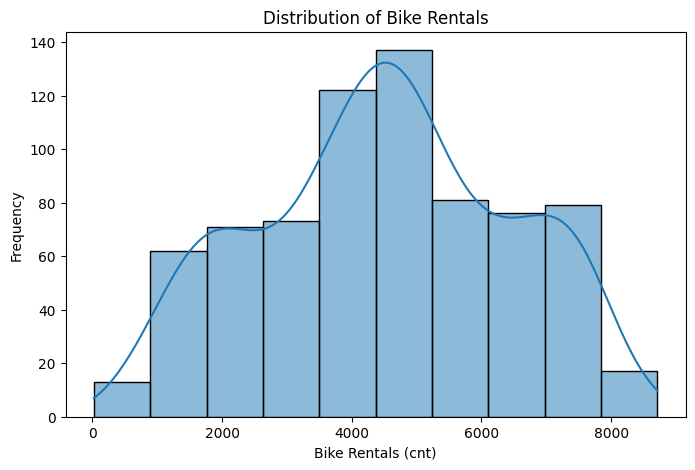

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(data['cnt'], kde=True, bins=10)
plt.title('Distribution of Bike Rentals')
plt.xlabel('Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()

## 📊 Dviračių nuomos skaičiaus (`cnt`) pasiskirstymas

### 🔹 1. Forma (forma / sklaida)
- Pasiskirstymas yra **šiek tiek dešiniakraštis** (teigiamai iškreiptas).
- Dauguma nuomos dienų tenka intervalui nuo **2000 iki 6000** nuomų.
- Galima matyti **uodegą į dešinę pusę**, rodančią, kad kai kuriomis dienomis dviračių nuoma buvo labai didelė.

---

### 🔹 2. Pikas (modiškumas)
- KDE kreivė rodo, kad pasiskirstymas yra **vienamodalinis** – t. y. turi vieną ryškų piką.
- Dažniausiai per dieną nuomota apie **4000–5000** dviračių – tai dažniausiai pasitaikantis kiekis.

---

### 🔹 3. Sklaida
- Nuomos skaičius svyruoja nuo beveik **0 iki daugiau nei 8000**.
- Tai rodo, kad **paklausa labai kinta** tarp dienų.

---

### 🔹 4. Išskirtys
- Nors nėra labai aiškių kraštinių verčių, dienos su **>8000 nuomų** gali būti laikomos **potencialiomis išskirtimis** – verta panagrinėti jas plačiau.

---

### 🔹 5. KDE kreivė (mėlyna linija)
- KDE kreivė padeda **išlyginti histogramą** ir parodyti bendrą tendenciją aiškiau nei tik stulpeliai.

---

### 🧠 Santraukos sakinys:
> „Dviračių nuomos skaičiaus pasiskirstymas yra šiek tiek dešiniakraštis, su piku ties 4000–5000. Dauguma dienų turėjo nuo 2000 iki 6000 nuomų, tačiau kai kuriomis dienomis skaičius viršijo ir 8000. 

In [48]:
# 2.0 Transformuojame data['dteday'] į datetime format - jei norite naudoti datą kaip skaitinį kintąjį (feature)
data['dteday'] = pd.to_datetime(data['dteday'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [50]:
# 2. Apskaičiuojame korealiacijas tarp skirtingų kintamųjų
correlations = data.corr()
print(correlations)


             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.016375  0.016375  0.205445 -0.110651  0.222204 -0.015937   
windspeed  -0.112620 -0.112620 -0.2290

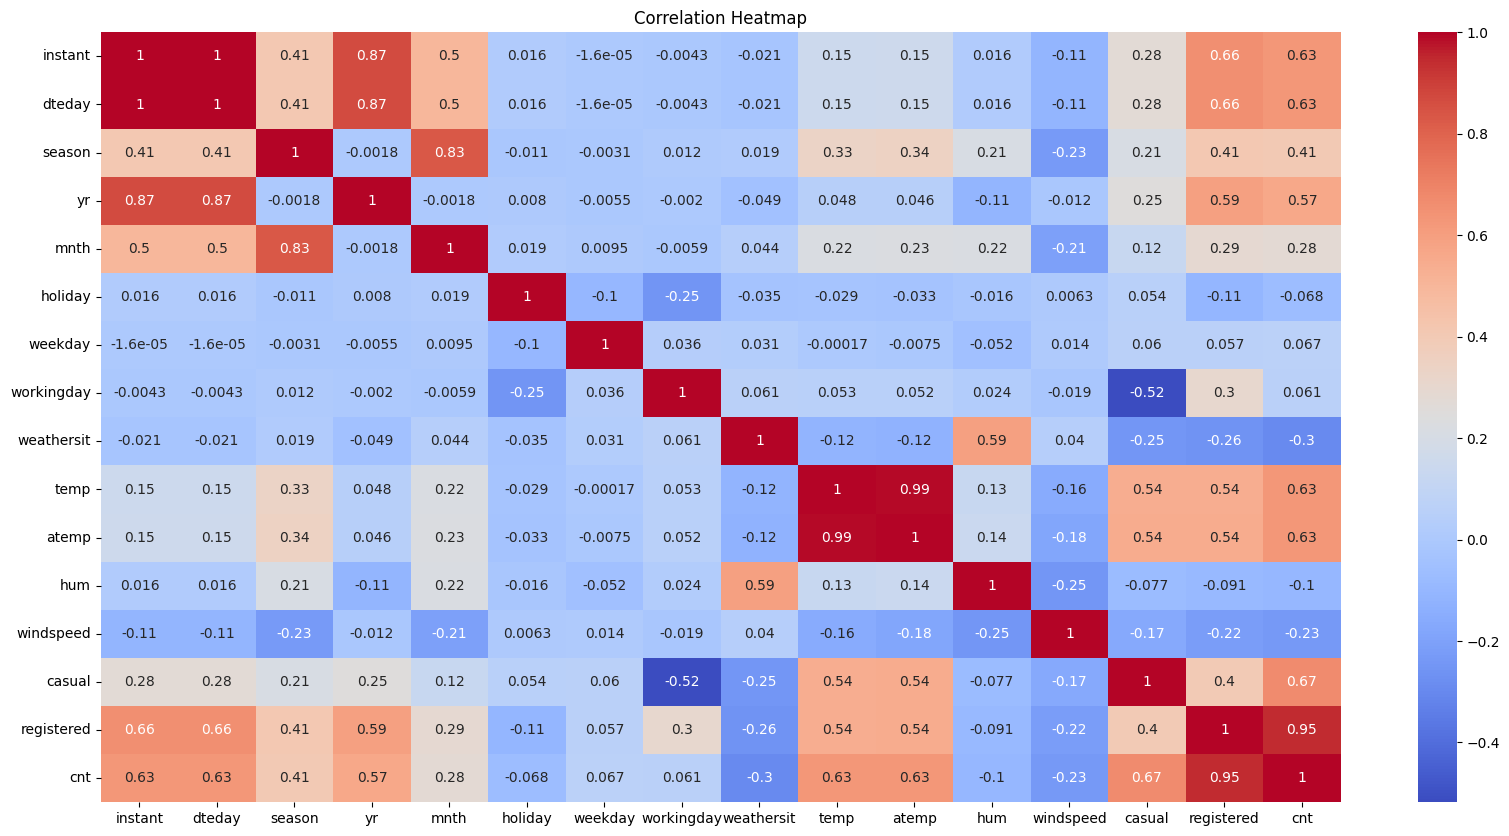

In [51]:
# Apskaičiuojame koreliaciją tarp visų skaitinių kintamųjų
corr_matrix = data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


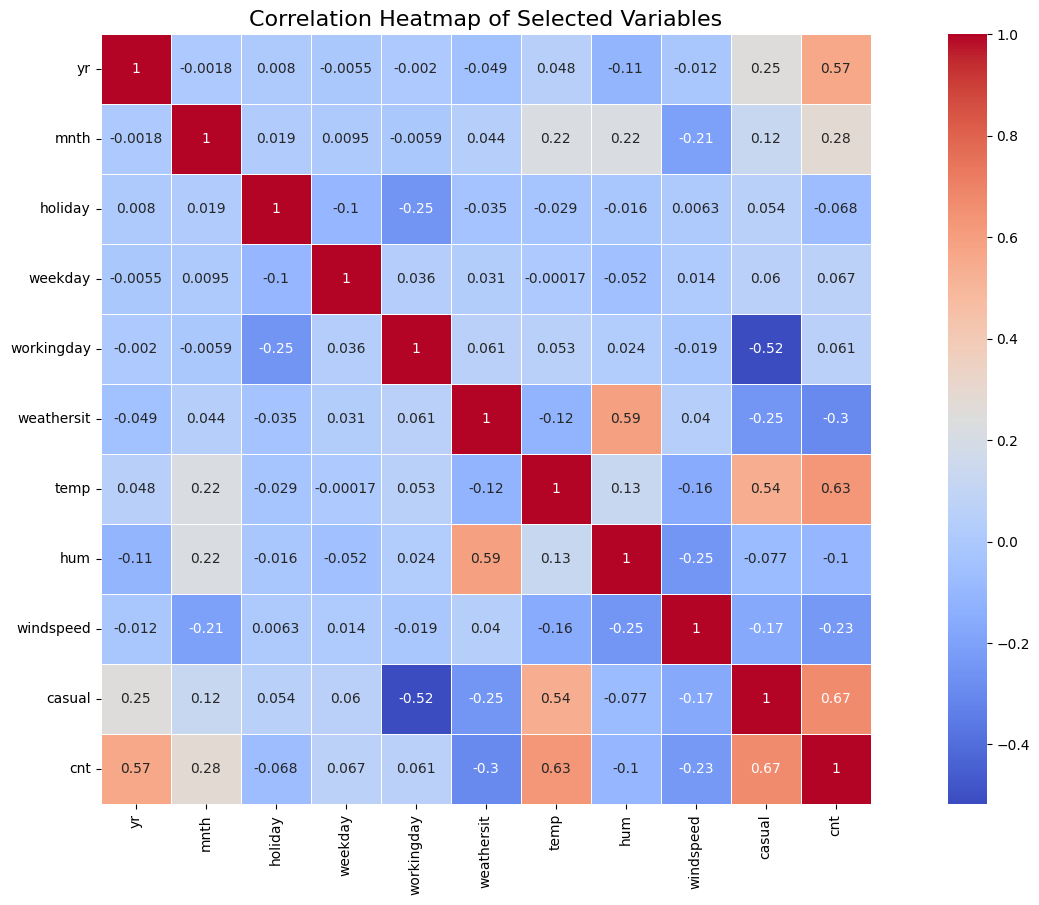

In [52]:
# Pasirenkame  stulpelius, kurie gali būti naudingi analizei, identifikuojame korealiuojančiu >0.85 tarpusavyke nepriklausomus kintamuosius
selected_columns = [
     'yr', 'mnth', 'holiday', 'weekday', 'workingday',
    'weathersit', 'temp', 'hum', 'windspeed',
    'casual', 'cnt'
]

# Apskaičiuojame koreliacijos matricą tik pasirinktų stulpelių
corr_matrix = data[selected_columns].corr()

# Sukuriame koreliacijos šilumos žemėlapį
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables', fontsize=16)
plt.show()

# Vizualizuojame koreliaciją tarp total 'cnt' ir kitų kintamųjų 

<Axes: xlabel='casual', ylabel='cnt'>

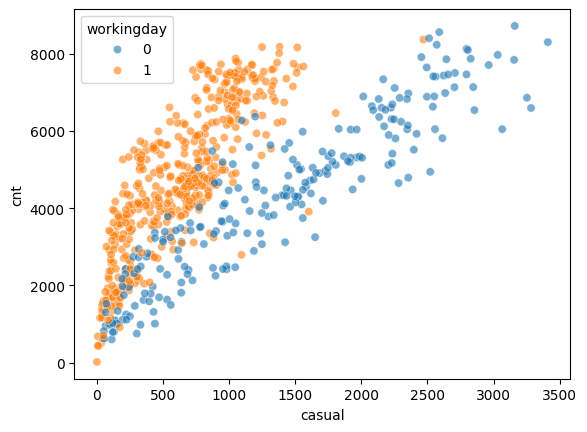

In [53]:
sns.scatterplot(x='casual', y='cnt', hue='workingday', data=data, alpha=0.6)

<Axes: xlabel='registered', ylabel='cnt'>

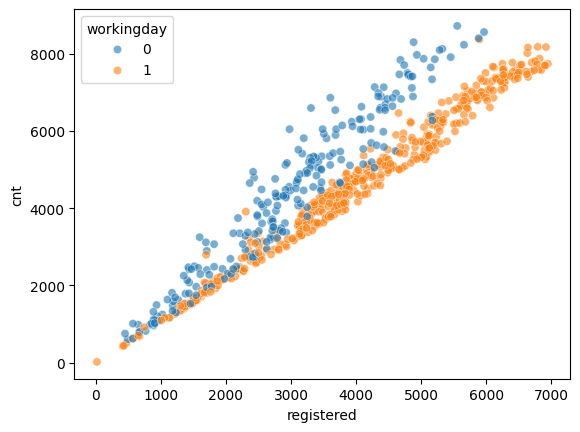

In [54]:
sns.scatterplot(x='registered', y='cnt', hue='workingday', data=data, alpha=0.6)

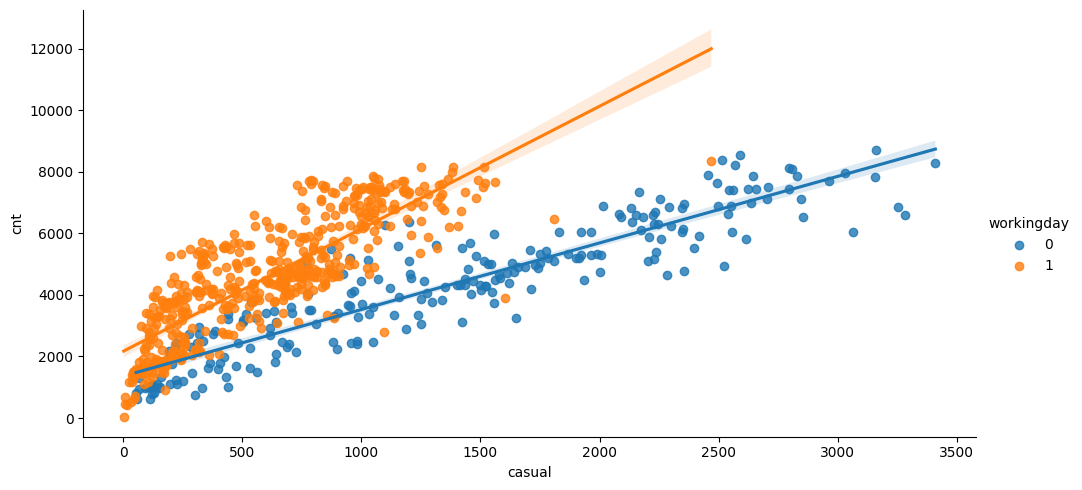

In [55]:
sns.lmplot(x='casual', y='cnt', hue='workingday', data=data, aspect=2)

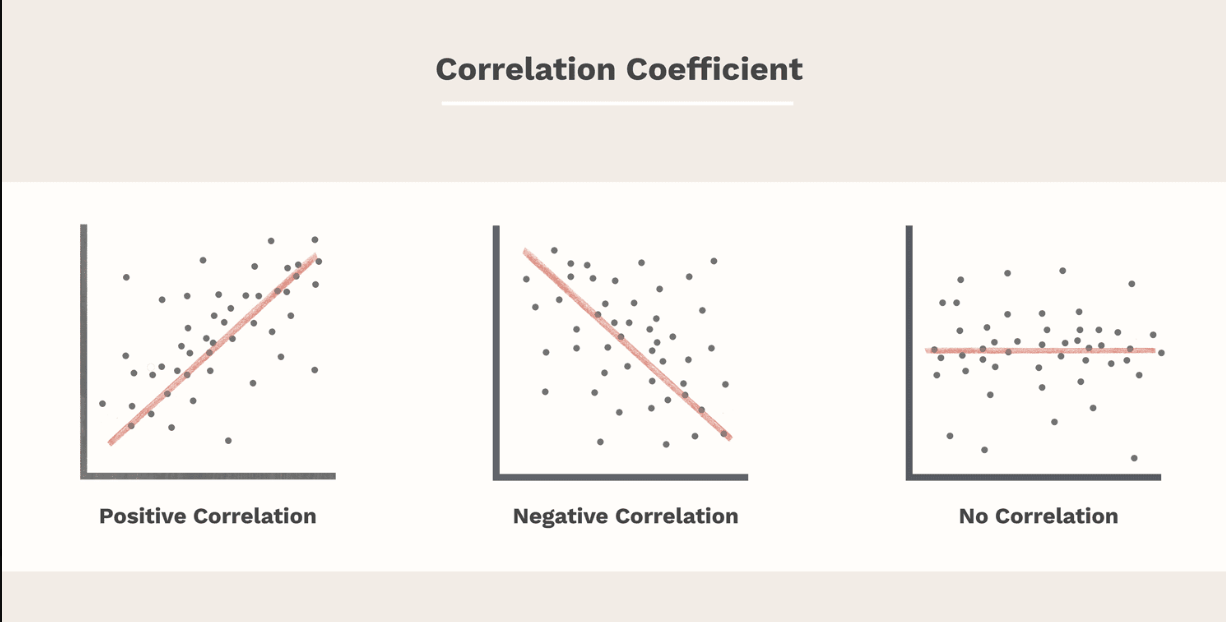

https://www.investopedia.com/terms/c/correlationcoefficient.asp
### 🧠 Naudotojų elgsenos įžvalga

Atsitiktinių naudotojų įtaka bendram dviračių nuomos kiekiui yra:

- **labiau prognozuojama ir linijiška darbo dienomis**, tikėtina dėl **stabilaus registruotų naudotojų elgesio**.
- **nedarbo dienomis** atsitiktinis naudojimas **dominuoja**, tačiau jo įtaka yra **mažiau pastovi**, galimai dėl **kintančių laisvalaikio įpročių**.

➡ Ši įžvalga padeda paaiškinti, kodėl modelio tikslumas gali skirtis darbo ir poilsio dienomis.

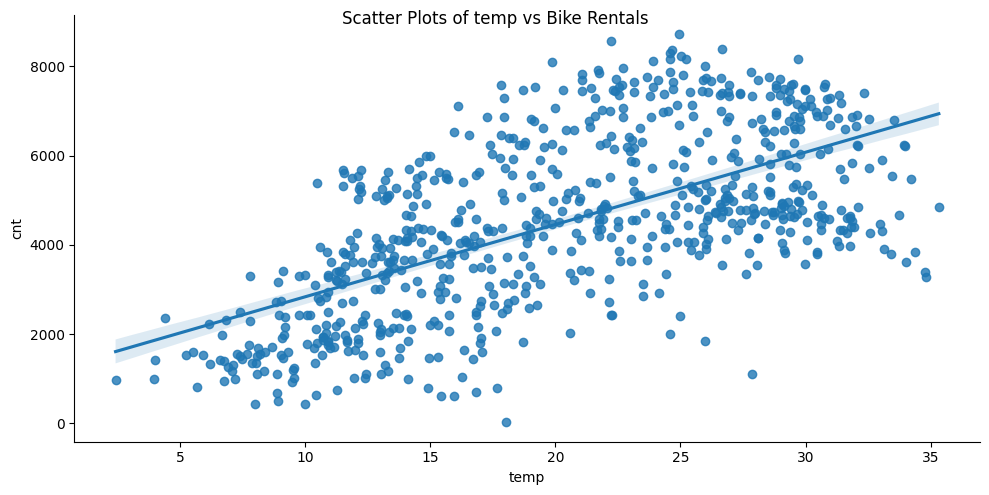

In [56]:
# Visualizacija su vienu kintamuoju/ feature
sns.lmplot(x='temp', y='cnt', data=data,aspect=2)
plt.suptitle('Scatter Plots of temp vs Bike Rentals')
plt.show()

### 📐 Studento t-testas regresijos koeficientams

Studento t-testas vertina, ar kiekvienas **regresijos koeficientas yra statistiškai reikšmingai skirtingas nuo nulio**.

**Svarbiausi stulpeliai `model.summary()` lentelėje:**

- **coef**: kiekvieno kintamojo įtaka (regresijos koeficientas).
- **std err**: standartinė paklaida.
- **t**: t statistika (coef / std err).
- **P>|t|**: p reikšmė – jei < 0.05, kintamasis **statistiškai reikšmingas**.

➡ **Jei `P>|t|` reikšmė < 0.05**, tai reiškia, kad kintamasis **reikšmingai prisideda** prie modelio paaiškinimo.

📌 Pastaba: nors `R²` parodo modelio bendrą tinkamumą, t-testas leidžia suprasti **kurių kintamųjų poveikis yra svarbus individualiai**.

In [57]:
X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
    'weathersit', 'temp', 'hum', 'windspeed',
    'casual', 'registered']]  # Features
y = data['cnt']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

In [58]:
import statsmodels.api as sm


# 1. Pridedame konstantą prie treniravimo ir testavimo duomenų
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 2. Sukuriame OLS modelį ir treniruojame
model = sm.OLS(y_train, X_train_const)
model_fitted = model.fit()

# 3. Naudojame išmoktą modelį prognozuoti testinius duomenis
y_pred = model_fitted.predict(X_test_const)

# 4. Galime įvertinti modelio tikslumą testiniuose duomenyse:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error as mae

print("📊 Test R²:", r2_score(y_test, y_pred))
print("📉 Test MSE:", mean_squared_error(y_test, y_pred))
print("📉 Test MAE:", mae(y_test, y_pred))

# 5. Peržiūrime rezultatus summary
print(model_fitted.summary())

📊 Test R²: 1.0
📉 Test MSE: 4.973282756000155e-24
📉 Test MAE: 1.897874148087386e-12
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.270e+31
Date:                Fri, 08 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:21:19   Log-Likelihood:                 14815.
No. Observations:                 584   AIC:                        -2.960e+04
Df Residuals:                     571   BIC:                        -2.955e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

In [59]:
# Patikriname ar nėra overfitting pagal train and test R² scorrodiklius
import statsmodels.api as sm
# from sklearn.linear_model import LinearRegression

# 1. Add constant to X
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 2. Fit OLS
ols_model = sm.OLS(y_train, X_train_const).fit()

# 3. Predict and evaluate
y_train_pred = ols_model.predict(X_train_const)
y_test_pred = ols_model.predict(X_test_const)

print(f"OLS: Train R2: {r2_score(y_train, y_train_pred):.2f}, Test R2: {r2_score(y_test, y_test_pred):.2f}")

OLS: Train R2: 1.00, Test R2: 1.00


## Nepastebimas skirtumas tarp treniravimo ir testavimo R²
### todėl modelis neatrodo **overfitted**, bet iš tikrųjų jis nėra prasmingas, nes yra **data leakage🚨**
- **casual + registered = cnt**

In [60]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [61]:
import statsmodels.api as sm

X = data[['yr', 'mnth', 'holiday', 
    'weathersit', 'temp',  'windspeed']]  # Features

y = data['cnt']  # Target variable



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
import statsmodels.api as sm

# 1. Pridedame konstantą prie treniravimo ir testavimo duomenų
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 2. Sukuriame OLS modelį ir treniruojame
model_OLS = sm.OLS(y_train, X_train_const, hasconst=True)
model_fitted = model_OLS.fit()

# 3. Naudojame išmoktą modelį prognozuoti testinius duomenis
y_pred = model_fitted.predict(X_test_const)

# 4. Galime įvertinti modelio tikslumą testiniuose duomenyse:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error as mae

print("📊 Test R²:", r2_score(y_test, y_pred))
print("📉 Test MSE:", mean_squared_error(y_test, y_pred))
print("📉 Test MAE:", mae(y_test, y_pred))

# 5. Peržiūrime rezultatus summary
print(model_fitted.summary())

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")

📊 Test R²: 0.7640080596321661
📉 Test MSE: 917930.29977693
📉 Test MAE: 742.095846404757
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     313.1
Date:                Fri, 08 Aug 2025   Prob (F-statistic):          8.62e-178
Time:                        18:21:19   Log-Likelihood:                -4822.9
No. Observations:                 584   AIC:                             9660.
Df Residuals:                     577   BIC:                             9690.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [62]:
## Gautų modelio koeficientų ir reikšmingumo peržiūra 

df_parameters_results = pd.DataFrame({
    'feature': X_train_const.columns,
    'p_value': model_fitted.pvalues.round(4),
    'coef': model_fitted.params.round(4)

})

df_parameters_results

,feature,p_value,coef
const,const,0.0000,1876.7906
yr,yr,0.0000,2060.4913
mnth,mnth,0.0000,93.3910
holiday,holiday,0.0003,-858.8872
weathersit,weathersit,0.0000,-794.4413
temp,temp,0.0000,128.8276
windspeed,windspeed,0.0000,-38.8935


In [66]:
data['cnt_prediction'] = y_pred
data['cnt_prediction'] = data['cnt_prediction'].round()
data['percentage_error'] = (((data['cnt_prediction'] - data['cnt']) / data['cnt']) * 100).round()
# data.to_csv('day_denormalised_with_predictions.csv', index=False)   
filtered_df = data[data['cnt_prediction'].notnull()]
filtered_df.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_prediction,percentage_error
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1566.0,16.0
12,13,2011-01-13,1,0,1,0,4,1,1,6.765000,7.54415,47.0417,20.167000,38,1368,1406,1263.0,-10.0
20,21,2011-01-21,1,0,1,0,5,1,1,7.277500,7.89165,45.7083,23.667214,75,1468,1543,1193.0,-23.0
30,31,2011-01-31,1,0,1,0,1,1,2,7.414153,9.31250,60.3750,12.541864,42,1459,1501,849.0,-43.0
32,33,2011-02-02,1,0,2,0,3,1,2,10.660000,12.72085,77.5417,17.708636,72,1454,1526,1159.0,-24.0
34,35,2011-02-04,1,0,2,0,5,1,2,8.663464,11.42935,58.5217,8.565213,88,1620,1708,1258.0,-26.0
46,47,2011-02-16,1,0,2,0,3,1,1,13.048701,15.81000,42.3478,16.869997,218,1897,2115,2294.0,8.0
48,49,2011-02-18,1,0,2,0,5,1,1,21.388347,25.59915,51.6667,17.749975,579,2348,2927,3334.0,14.0
50,51,2011-02-20,1,0,2,0,0,0,1,11.693897,13.86650,40.7826,14.956745,639,1173,1812,2194.0,21.0
58,59,2011-02-28,1,0,2,0,1,1,2,16.698193,20.00590,87.6364,19.408962,81,1365,1446,1871.0,29.0



### 📐 Studento t-testas (koeficientų reikšmingumas)

| Kintamasis   | Koeficientas | P>\|t\| reikšmė | Interpretacija                          |
|--------------|--------------|-----------------|------------------------------------------|
| Intercept    | 2253.63      | 0.000           | ✅ Reikšminga bazinė reikšmė              |
| weathersit        | -591.62      | 0.000           | ✅ Blogas oras mažina nuomą        |
| temp         | 100.67      | 0.000           | ✅ Teigiama įtaka nuomos kiekiui          |
| workingday   | 999.42      | 0.000           | ✅ Darbo dienomis daugiau išnuomojamų dviračių           |
| windspeed   | -38.18      | 0.000           | ✅ Stipresnis vėjas mažina nuomą            |

#### 📊 Modelio bendras tinkamumas

- **R² = 0.474** – modelis paaiškina apie **47 % dviratininkų nuomos variacijos**.


---
### 📐 Studento t-testas regresijos koeficientams


**Kiti varbiausi stulpeliai `model.summary()` lentelėje:**

- **coef**: kiekvieno kintamojo įtaka (regresijos koeficientas).
- **std err**: standartinė paklaida.
- **t**: t statistika (coef / std err).
- **P>|t|**: p reikšmė – jei < 0.05, kintamasis **statistiškai reikšmingas**.

➡ **Jei `P>|t|` reikšmė < 0.05**, tai reiškia, kad kintamasis **reikšmingai prisideda** prie modelio paaiškinimo.

📌 Pastaba: nors `R²` parodo modelio bendrą tinkamumą, t-testas leidžia suprasti **kurių kintamųjų poveikis yra svarbus individualiai**.7

## 🤔 Kodėl jie skiriasi?

---

### 🔹 `r2_score()` iš `sklearn.metrics`:

- Tai yra **klasikinis R²**, su **centravimu**, t. y. lygina modelio tikslumą su **vidutine reikšme** kaip baziniu modeliu.



➡️ Tai tavo **tikrasis testinis R²**, ir **šitas rodiklis tau svarbiausias**.

---

### 🔸 `R-squared (uncentered)` iš `statsmodels.summary()`:

- Čia apskaičiuotas **R² be centravimo** – t. y. **nelyginama su vidutine reikšme**.
- Tai daroma, kai modelyje **nėra konstantos (intercept)**, arba kai naudojamas `sm.OLS(y, X)` **be `add_constant()`**.



---

### 🔍 (`add_constant()`)

✅ 
- Realiai **modelis turi interceptą**.
- Bet `statsmodels` vis tiek **kartais išspausdina** `R-squared (uncentered)`, nebent aiškiai nurodoma kitaip.

---



## Galime paeksperimentuoti pasirinktami kitą target iš duomenų seto. Pvz Registered.

In [ ]:
# Kuriame regresijos modelį, kad prognozuotume 'registered' (bendras dviračių nuomos skaičius) remiantis 'weathersit', 'temp', 'workingday' ir 'windspeed' savybėmis.
# Atskirime duomenis į treniruočių ir testavimo rinkinius, kad galėtume įvertinti modelio tikslumą.
X = data[['weathersit', 'temp', 'workingday', 'windspeed']]  # Features
y = data['registered']  # Target variable
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Sukuriame treniravimo duomenų DataFrame
train_df = X_train.copy()
train_df['registered'] = y_train

# Sukuriame modelį naudodami formulę
formula = 'registered ~ ' + ' + '.join(X_train.columns)  # automatizuotai įterpia visus kintamuosius
# model_sm = smf.ols('cnt ~ temp + hum + windspeed', data=train_df).fit() - tas pats, bet su rankiniu įterpimu stulpelių pavadinimų
model_sm = smf.ols(formula=formula, data=train_df).fit()

# ANOVA lentelė
anova_results = anova_lm(model_sm)
print("📊 ANOVA analizė:")
print(anova_results) #F testas, kuris parodo, ar yra reikšmingų skirtumų tarp grupių
print(model_sm.summary()) #pateikiama išsami modelio santrauka su statistiniais rodikliais

📊 ANOVA analizė:
               df        sum_sq       mean_sq           F        PR(>F)
weathersit    1.0  8.147086e+07  8.147086e+07   59.586060  5.162802e-14
temp          1.0  3.631794e+08  3.631794e+08  265.621751  1.980239e-49
workingday    1.0  1.202647e+08  1.202647e+08   87.959022  1.493735e-19
windspeed     1.0  1.363900e+07  1.363900e+07    9.975278  1.669218e-03
Residual    579.0  7.916554e+08  1.367281e+06         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     105.8
Date:                Fri, 08 Aug 2025   Prob (F-statistic):           1.31e-67
Time:                        18:09:54   Log-Likelihood:                -4951.6
No. Observations:                 584   AIC:                             9913

#### 🔷 1. ANOVA analizė (modelio reikšmingumas)

Visi į modelį įtraukti kintamieji yra **statistiškai reikšmingi** (`p < 0.05`), todėl daro reikšmingą įtaką dviratininkų nuomos kiekiui:

- **temp**: didžiausią įtaką turintis veiksnys – šiltesnė temperatūra stipriai padidina nuomą.
- **workingday**: darbo dienos sąlygoja reikšmingai kitokį nuomos modelį nei savaitgaliai.
- **weathersit**: blogas oras (lietus, rūkas) mažina nuomos skaičių.
- **windspeed**: didesnis vėjas šiek tiek mažina nuomą.

➡ Modelis gerai paaiškina dviratininkų elgseną, tačiau dar lieka nepilnai paaiškinta likutinė variacija (Residual).


ANOVA lentelės stulpelis **PR(>F)** parodo, ar kiekvienas kintamasis **statistiškai reikšmingai prisideda prie modelio paaiškinamos dispersijos**.


🔎 **Išvada:** visi trys modelyje įtraukti kintamieji (temp, weathersit, windspeed) **statistiškai reikšmingi** (p < 0.05).

### 📐 Kaip interpretuoti F statistikos reikšmę ANOVA analizėje?

**F statistika** ANOVA analizėje parodo, kiek geriau regresijos modelis su pasirinktais kintamaisiais paaiškina priklausomą kintamąjį (pvz., `registered`) palyginti su modeliu be šių kintamųjų (tik su konstanta).


---

✅ **Kaip interpretuoti:**

| **F reikšmė**                   | **Interpretacija**                                |
|----------------------------------|----------------------------------------------------|
| Didelė (pvz. > 10)              | Modelis paaiškina reikšmingą Y dalį                |
| Maža (~1)                       | Modelis **ne geresnis už atsitiktinį spėjimą**     |
| F = NaN (residual row)         | Tai tik likutinė dalis – be skaičiavimo            |

---

### 📌 Pavyzdys:
Jei `temp` turi **F = 274.53** ir **p reikšmę = 9.38e-51**, tai reiškia:
- Temperatūra daro **labai stiprią** įtaką dviratininkų nuomos skaičiui.
- Tokia reikšmė **tikrai nėra atsitiktinė** → šį kintamąjį verta palikti modelyje.

## 🤖📚 Scikit-learn Library Functionality 🔍📈⚙️

In [ ]:
# Training the model with Scikit-learn library functionality
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Modelio apibendrinimas ir koeficientų interpretacija

In [ ]:
# Apskaičiuojame prognozesa
coefficients = pd.Series(model.coef_, index=X_train.columns)

print("🔢 Coefficients:\n")
coefficients

🔢 Coefficients:



weathersit   -574.503218
temp           98.391099
workingday    971.551458
windspeed     -29.901383
dtype: float64

In [ ]:
# predictions = model.predict(X_test)
y_pred = model.predict(X_test)

## Vizualizacijos
- Sklaidos grafikas: faktinės vs prognozuotos reikšmės
  - **Idealu**, jei taškai išsidėsto aplink įstrižainę.
  - Didelė sklaida → modelį galima tobulinti.

MAE: 1072.6662716828055


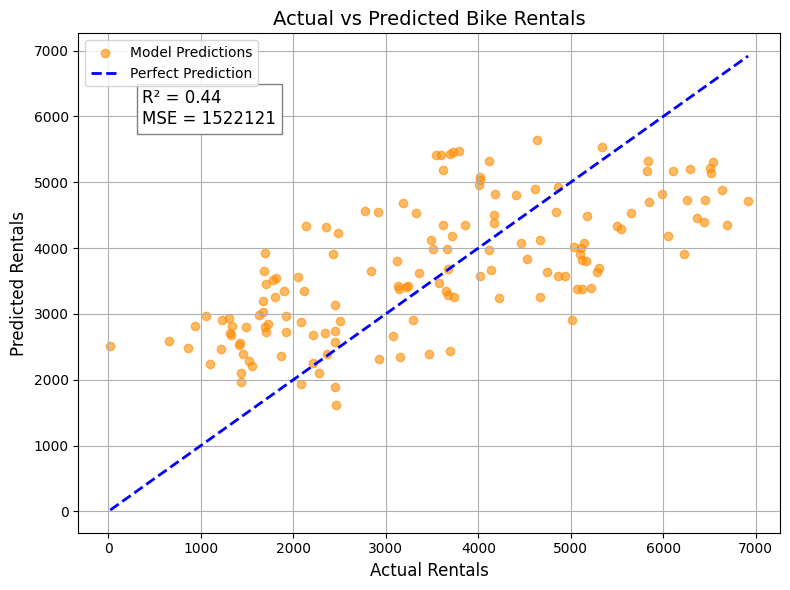

In [ ]:
# 1. Calculate R² and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


# 2. Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='darkorange', label='Model Predictions')

# Diagonal tobulos prognozės linijos
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'b--', linewidth=2, label='Perfect Prediction')

# 3. Plot styling
plt.title('Actual vs Predicted Bike Rentals', fontsize=14)
plt.xlabel('Actual Rentals', fontsize=12)
plt.ylabel('Predicted Rentals', fontsize=12)
plt.legend()

# 4. Priskiriame metrikas į tekstą ir pridedame jį prie grafiko
plt.text(min_val + (max_val - min_val) * 0.05,
         max_val - (max_val - min_val) * 0.15,
         f'R² = {r2:.2f}\nMSE = {mse:.0f}',
         fontsize=12,
         bbox=dict(facecolor='white', edgecolor='gray'))

plt.grid(True)
plt.tight_layout()
plt.show()

### 📈 Faktinių ir prognozuotų nuomos reikšmių palyginimo interpretacija

Grafike pavaizduotas **modelio prognozių tikslumas**, lyginant tikrąsias (X ašis) ir prognozuotas (Y ašis) dviratininkų nuomos reikšmes.

#### 🔍 Ką matome:

- **Oranžiniai taškai** žymi prognozes, gautas iš modelio. Kiekvienas taškas atitinka vieną stebėjimą.
- **Mėlyna brūkšninė linija** – ideali linija, kur būtų visi taškai, jei prognozės būtų tobulai tikslios (t. y. jei `prognozė = faktas`).
- Dauguma taškų yra **netoli** šios linijos, tačiau pastebima ir **sklaida**, ypač didesnėse nuomos apimtyse.

#### 📊 Įvertinimai grafike:

- **R² = 0.38** – tai reiškia, kad modelis paaiškina apie **38 % duomenų variacijos**. Tai vidutinis rezultatas, rodo, kad modelis turi aiškinamąją galią, bet dar galima tobulinti.
- **RMSE = 1157** – vidutinė prognozės paklaida yra apie **1157 naudotojai**, tai gana reikšminga, ypač kai nuomos apimtys siekia 6000–8000.

#### 🧠 Išvada:

- Modelis sugeba **gan tiksliai prognozuoti bendras tendencijas**, tačiau yra pakankamai didelė sklaida, ypač esant didesniam naudotojų kiekiui.
- Galima svarstyti:
  - modelio tobulinimą (pvz., naudoti kitą algoritmą),
  - duomenų transformavimą arba
  - papildomų kintamųjų įtraukimą, kad pagerintume R² ir sumažintume RMSE.

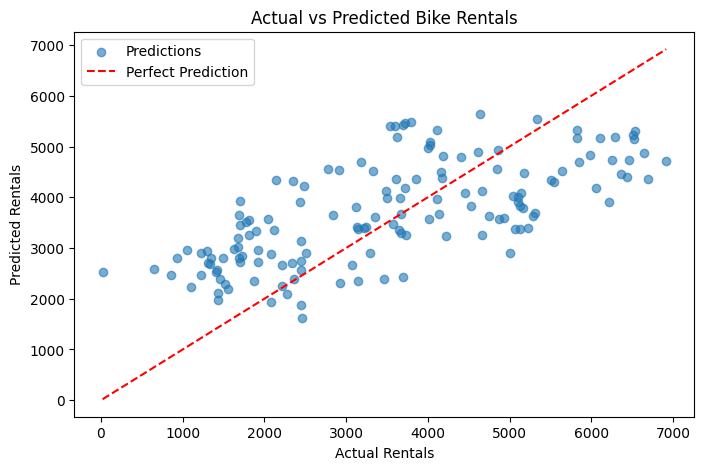

In [ ]:
# Plotting actual vs predicted values with a reference line
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.title('Actual vs Predicted Bike Rentals')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.legend()
plt.show()

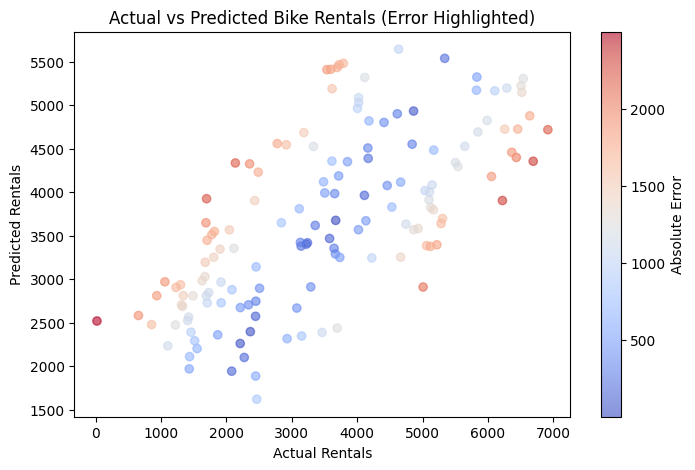

In [ ]:
# Resuduas erros plot
errors = abs(y_test - y_pred)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Absolute Error')
plt.title('Actual vs Predicted Bike Rentals (Error Highlighted)')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.show()


### Modelio apibendrinimas ir koeficientų interpretacija
- Iš modelio `summary()` pateikiami:
  - **Koeficientai (`coef`)** – kiek padidėja/mažėja `cnt`, kai kinta konkretus kintamasis.
  - **p reikšmės (`P>|t|`)** – ar šie koeficientai statistiškai reikšmingi.

In [ ]:
# Modelio tikslumo įvertinimas
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))


R-squared: 0.44471926872101286


## Modelio paklaidų analizė

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE:', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1072.6662716828055
MSE: 1522120.5869327674
RMSE: 1233.742512412038


### 📏 Modelio paklaidų įvertinimas

Modelio kokybė vertinta pagal tris pagrindines regresijos paklaidos metrikas:

- **MAE (Mean Absolute Error)** – vidutinė absoliuti paklaida:
  - `MAE = 999`
  - Vidutinis netikslumas tarp prognozuotų ir tikrų reikšmių yra apie **1304 dviratininkų**.

- **MSE (Mean Squared Error)** – vidutinė kvadratinė paklaida:
  - `MSE = 1 337 539`
  - Kuo didesnė kvadratinė paklaida, tuo daugiau įtakos turi didesnių klaidų išsiskyrimai (outlieriai).

- **RMSE (Root Mean Squared Error)** – kvadratinės paklaidos šaknis:
  - `RMSE = 1157`
  - Interpretuojama ta pačia reikšmių skale kaip ir priklausomas kintamasis (naudojimo patogumui). Tai reiškia, kad vidutinė paklaida yra apie **1537 naudotojų**.

➡ **Išvada:** modelio vidutinė paklaida yra virš 1 500 naudotojų, todėl galima tobulinti modelį, pavyzdžiui, pridedant daugiau reikšmingų kintamųjų arba panaikinant išsiskyrusius duomenis.

### 📌 Kada tinkamas laikas atlikti ANOVA ir Studento t-testą?

**Trumpas atsakymas:**
> ✅ Geriausia **ANOVA** analizę ir **Studento t-testą** atlikti **po to**, kai pašalinti stipriai koreliuojantys kintamieji.

---

### 🔍 Kodėl?

#### 🔁 1. Prieš pašalinant koreliuojančius kintamuosius

- Galima atlikti testus, bet rezultatai gali būti **klaidinantys**, nes:
  - Multikolinearumas išpučia standartines paklaidas.
  - p reikšmės gali būti netikslios (rodo, kad reikšmingi kintamieji yra nereikšmingi).
  - Blogėja modelio interpretacija ir patikimumas.

⚠️ **Multikolinearumas trukdo tiksliai vertinti kintamųjų reikšmingumą.**

---

#### ✂️ 2. Po koreliuojančių kintamųjų pašalinimo

- Kai pašalinami / apdorojami stipriai koreliuojantys kintamieji:
  - Modelio **standartinės paklaidos mažėja**.
  - **t-testas** ir **ANOVA** tampa **tikslesni ir interpretuojami**.
  - Gali geriau įvertinti, kurie kintamieji **tikrai daro įtaką Y**.

---

### ✅ Rekomenduojama analizės eiga:

1. 📊 Atlik koreliacijos analizę (`.corr()` + heatmap)
2. ✂️ Pašalink / apdorok koreliuojančius kintamuosius (pvz., jei ρ > 0.85)
3. 📈 Sukurk modelį
4. 📐 Atlik ANOVA ir Studento t-testą
5. 🧠 Interpretuok rezultatus remiantis patikimais p reikšmių įverčiais




### ✅ Apibendrinimas:

- Visi galutinio modelio kintamieji yra **statistiškai reikšmingi** (pagal ANOVA ir t-testus).
- Modelis tinkamas, tačiau **dar yra neišaiškintos variacijos**, todėl būtų verta:
  - pridėti papildomų paaiškinančių kintamųjų (pvz., valandos, darbo diena),
  - arba išbandyti kitus modelius (pvz., Random Forest, XGBoost).